In [89]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
import time
from IPython.display import Image
from lxml import etree


In [88]:
chrome_options = Options()
# 无头模式启动
chrome_options.add_argument('--headless')
# 谷歌文档提到需要加上这个属性来规避bug
chrome_options.add_argument('--disable-gpu')

chrome_options.add_argument("--window-size=1960,1080");
# 初始化实例
driver= webdriver.Chrome('/opt/chrome/chromedriver',chrome_options=chrome_options)

/home/wanw/tmp/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: use options instead of chrome_options


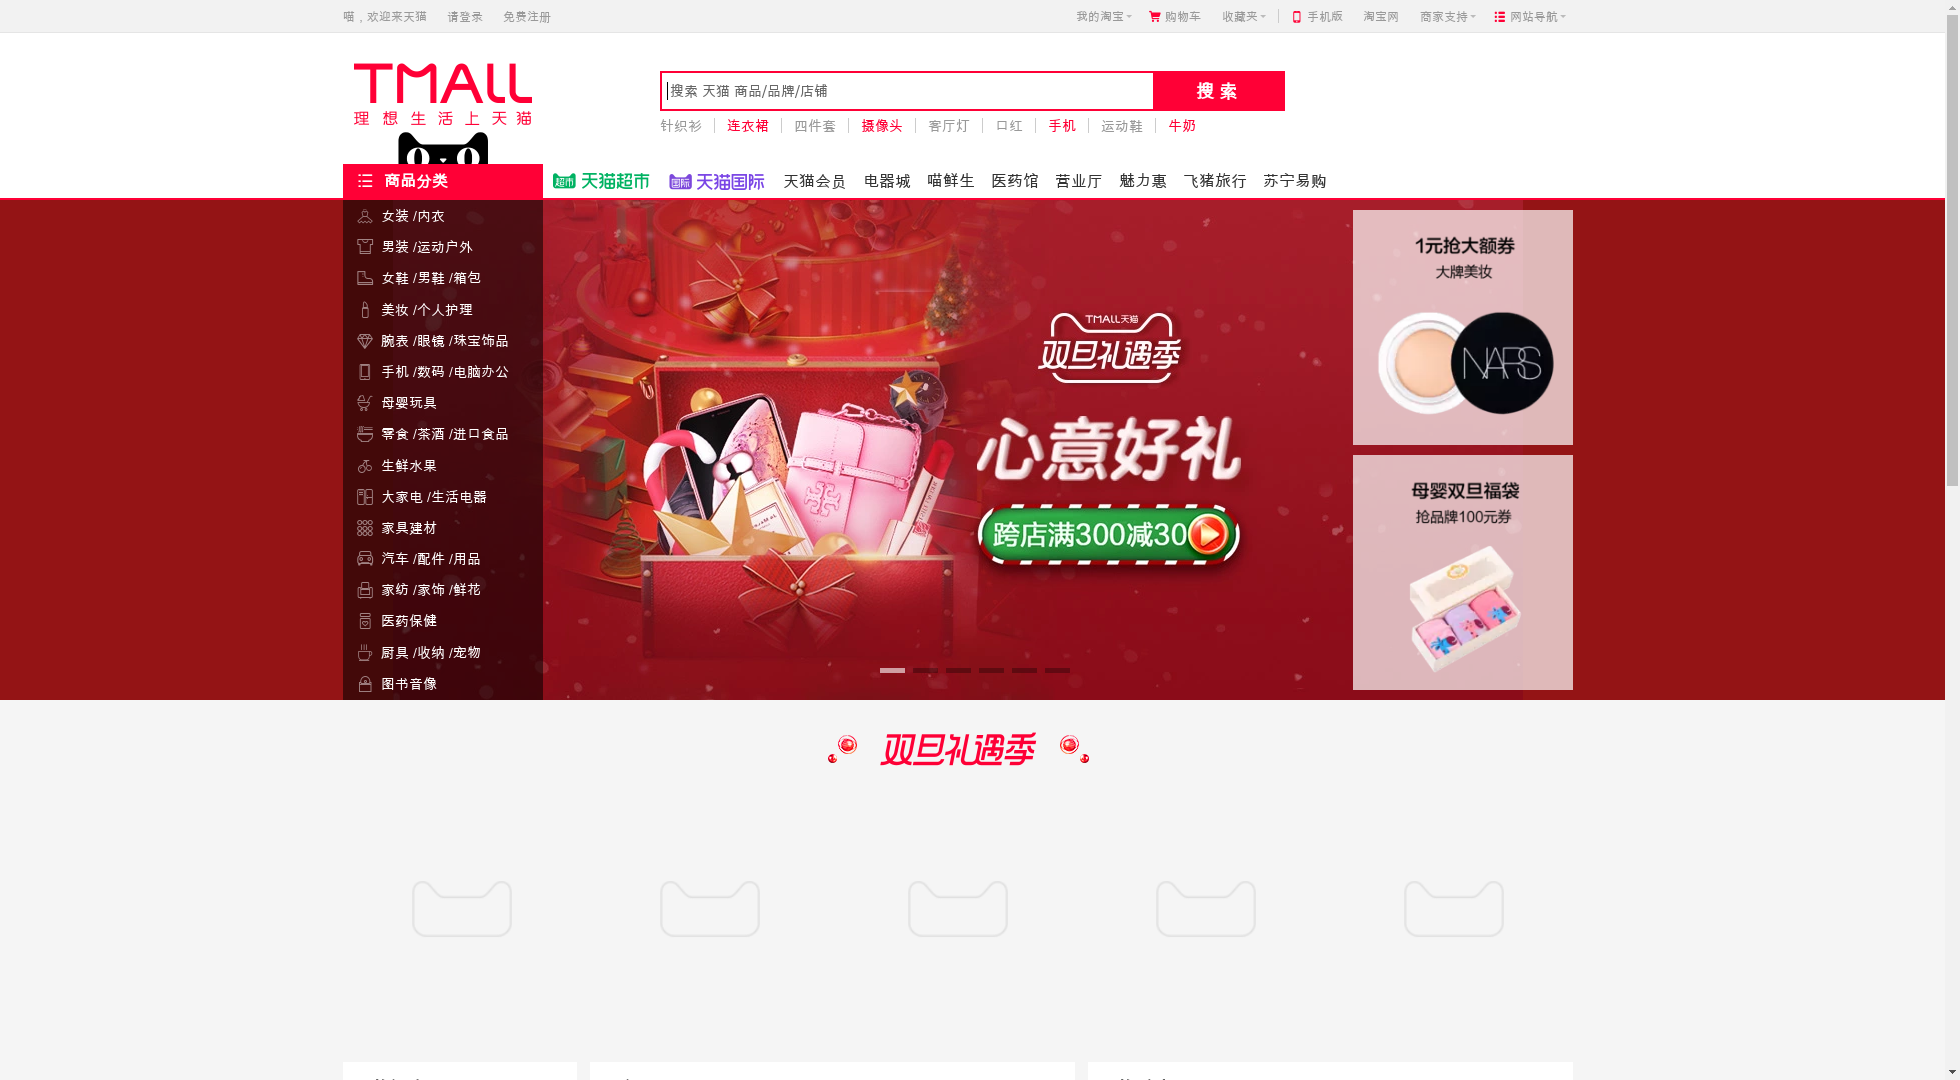

In [113]:
driver.get('http://www.tmall.com')
driver.save_screenshot('screenshot/index.png')
Image('screenshot/index.png')

In [119]:
login = driver.find_elements_by_class_name('sn-login')[0]
login.text

'请登录'

In [123]:
search_input = driver.find_elements_by_class_name('s-combobox-input-wrap')[0]
driver.find_elements_by_partial_link_text('搜索')

[]

In [90]:
keyword = "格力 空调"

In [91]:
query_url='https://list.tmall.com/search_product.htm?q={}&sort=d&s={}'.format(keyword,0)

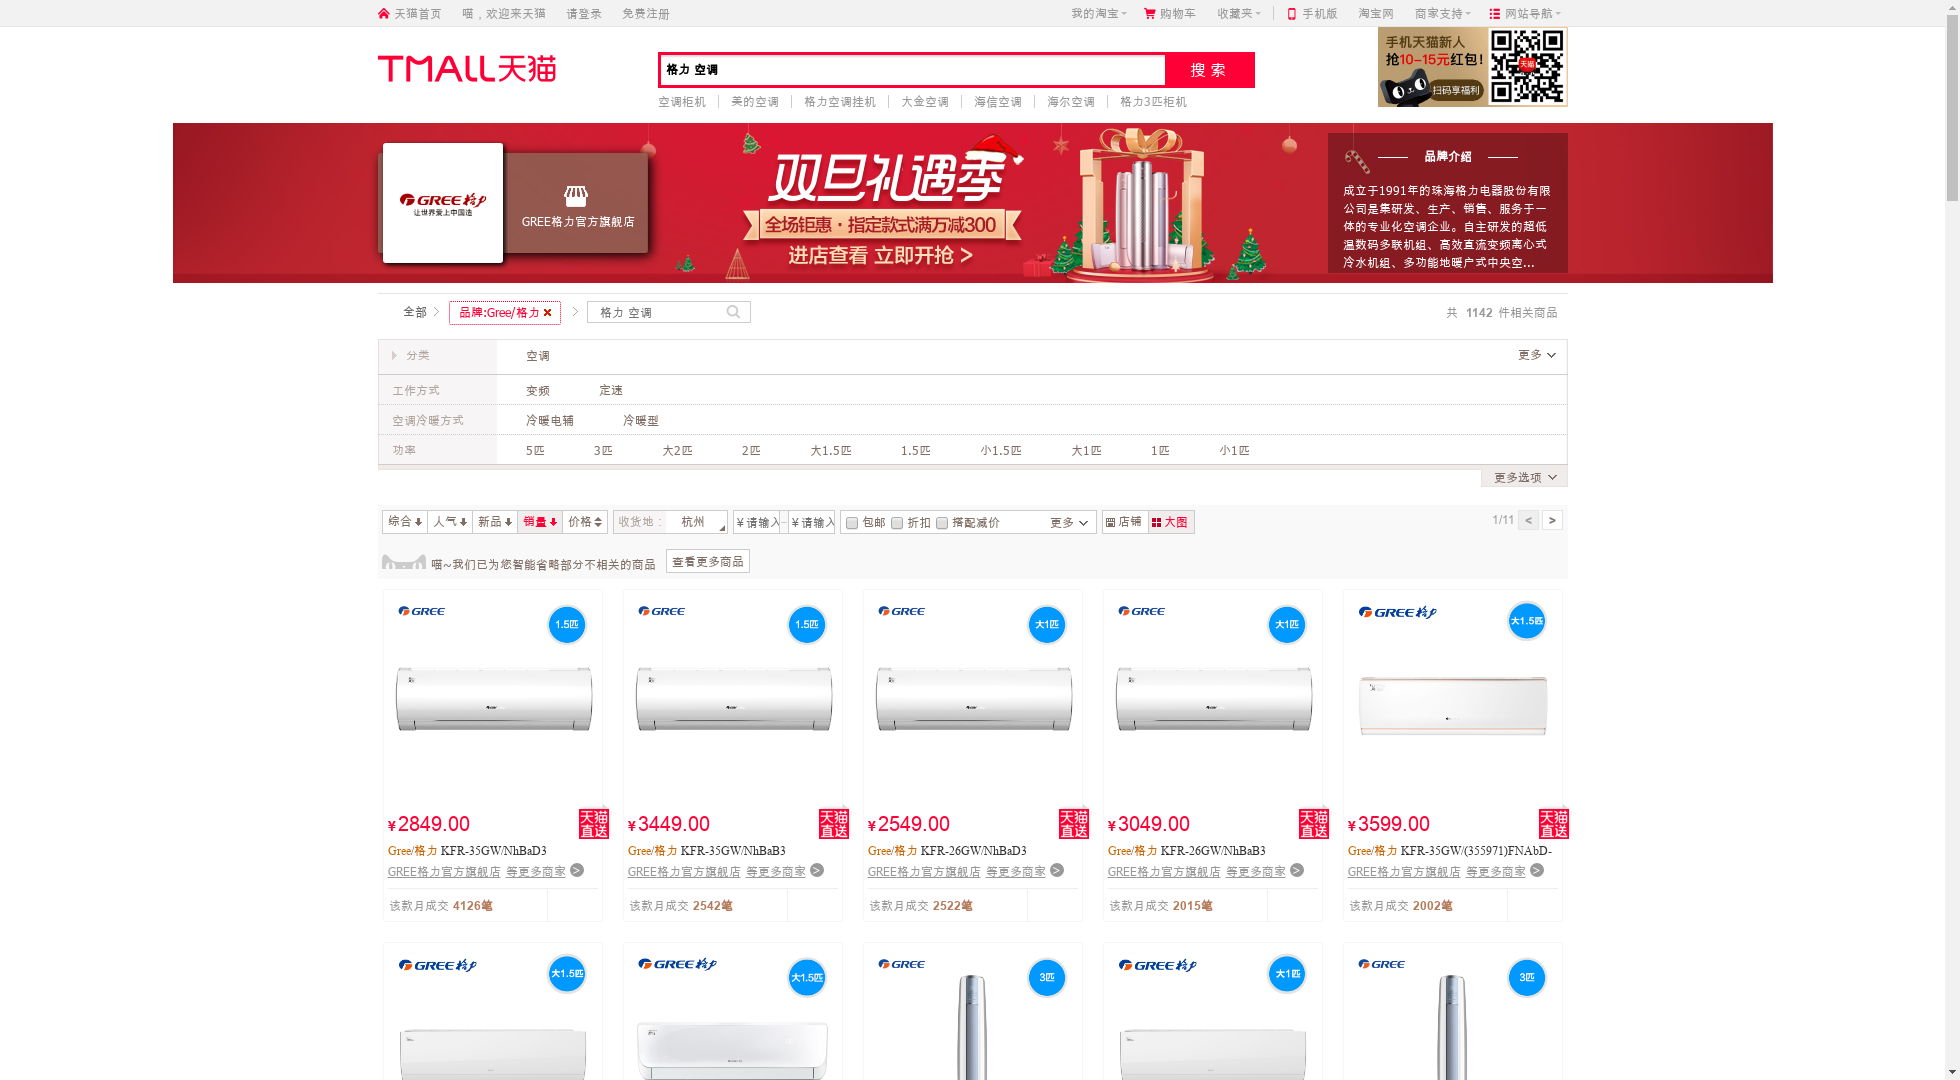

In [95]:
driver.get(query_url)
driver.save_screenshot('screenshot/products.png')
Image('screenshot/products.png')

In [80]:
driver.page_source

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" class="ks-webkit537 ks-webkit ks-chrome71 ks-chrome no-touch"><head><script type="text/javascript" async="" src="https://g.alicdn.com/alilog/oneplus/entry.js?t=214621"></script><script charset="utf-8" src="https://s.tbcdn.cn/s/kissy/gallery/??switchable/1.3.1/index-min.js?t=20130804.js" async=""></script><script src="//acc.alicdn.com/tfscom/TB1XEs7RXXXXXXuXXXXXXXXXXXX.js" async=""></script><script charset="utf-8" src="https://g.alicdn.com/tm/list/2.25.17/??shortcut.js?t=20130804.js" async=""></script><script type="text/javascript" async="" src="https://g.alicdn.com/secdev/entry/index.js?t=214621" id="aplus-sufei"></script><script>/*! 2018-12-18 10:06:15 v8.7.8 */\n!function(e){function i(n){if(o[n])return o[n].exports;var r=o[n]={exports:{},id:n,loaded:!1};return e[n].call(r.exports,r,r.exports,i),r.loaded=!0,r.exports}var o={};return i.m=e,i.c=o,i.p="",i(0)}([function(e,i){"use strict";var o=window,n=document;!function(){var e

In [96]:
def parse_deal(text_string):
    texts = text_string.split(' ')
    monthDealStr = texts[1]
    monthDeal = -1
    if monthDealStr and monthDealStr[-2:]=='万笔':
        monthDeal = int(float(monthDealStr[:-2])*10000)
    elif monthDealStr and monthDealStr[-1:]=='笔':
        monthDeal = int(monthDealStr[:-1])
    return monthDeal

def parse_price(text_string):
    if text_string[0].isdigit():
        return float(text_string)
    else:
        return float(text_string[1:])

In [97]:
#driver.get("http://www.tmall.com")
driver.get_cookies()

[{'domain': 'list.tmall.com',
  'expiry': 1547869321,
  'httpOnly': False,
  'name': 'pnm_cku822',
  'path': '/',
  'secure': False,
  'value': '098%23E1hvZQvUvbpvUvCkvvvvvjiPR25Uzj1PPFzvsjivPmPUgjtbRF5W1jlWRLFwzjlERphvCvvvphvPvpvhvv2MMQhCvvOv9hCvvvmtvpvIvvCvpvvvvvvvvhNSvvvmjvvvB%2FGvvvUwvvCjqQvvv3QvvhNSvvvmj8yCvv9vvhheEYbcIgyCvvOCvhEvzWpEvpCW9vBUoC0QrEgXV5EV%2Bnezr2UpwhKn3feAhCDsowexRdItn0vEYE7rj8TNw6SOlC0OeEr1pd2XrqpAhjvnY4vTHdJcwyf1QEoaWLyDB8wCvvpvvhHh'},
 {'domain': 'list.tmall.com',
  'expiry': 1860637296,
  'httpOnly': False,
  'name': '_med',
  'path': '/',
  'secure': False,
  'value': 'dw:1960&dh:1080&pw:1960&ph:1080&ist:0'},
 {'domain': '.tmall.com',
  'expiry': 1560829320,
  'httpOnly': False,
  'name': 'isg',
  'path': '/',
  'secure': False,
  'value': 'BDU15Drehe8sm-FTKHgeOlbmT7jlsttJp4AG1bda8az7jlWAfwL5lEMM3BsdzgF8'},
 {'domain': 'list.tmall.com',
  'expiry': 1576813325,
  'httpOnly': False,
  'name': 'cq',
  'path': '/',
  'secure': False,
  'value': 'ccp%3D1'},
 {'doma

In [98]:
divs = driver.find_elements_by_xpath('//div[@id="J_ItemList"]/div')

In [99]:
for div in divs:
    #print(div.find_element_by_class_name("productPrice"))
    price = div.find_element_by_class_name("productPrice")
    print(parse_price(price.text))
    title = div.find_element_by_class_name("productTitle")
    print(title.text)
    deal  = div.find_element_by_class_name("productStatus")
    print(parse_deal(deal.text))
    #print(dir(title))
    #print(title.get_attribute('value'))
    title_xml = title.get_attribute('innerHTML')
    html = etree.HTML(title_xml)
    #print(title_xml)
    print(html.xpath('//a/@href')[0])
    #print(div.find_elements_by_xpath('div/p[1]/em/text()'))

2849.0
Gree/格力 KFR-35GW/NhBaD3
4126
//detail.tmall.com/item.htm?id=551008959296&skuId=3362446137322&standard=1&user_id=3079263591&cat_id=2&is_b=1&rn=8a4b8bf9d2e81b4e1001c8538888d2c7
3449.0
Gree/格力 KFR-35GW/NhBaB3
2542
//detail.tmall.com/item.htm?id=550888736149&skuId=3526621970613&standard=1&user_id=3079263591&cat_id=2&is_b=1&rn=8a4b8bf9d2e81b4e1001c8538888d2c7
2549.0
Gree/格力 KFR-26GW/NhBaD3
2522
//detail.tmall.com/item.htm?id=551008715553&skuId=3361995964715&standard=1&user_id=3079263591&cat_id=2&is_b=1&rn=8a4b8bf9d2e81b4e1001c8538888d2c7
3049.0
Gree/格力 KFR-26GW/NhBaB3
2015
//detail.tmall.com/item.htm?id=550943121873&skuId=3362008004431&standard=1&user_id=3079263591&cat_id=2&is_b=1&rn=8a4b8bf9d2e81b4e1001c8538888d2c7
3599.0
Gree/格力 KFR-35GW/(355971)FNAbD-A3
2002
//detail.tmall.com/item.htm?id=543802723409&skuId=3273704213431&standard=1&user_id=3079263591&cat_id=2&is_b=1&rn=8a4b8bf9d2e81b4e1001c8538888d2c7
4399.0
Gree/格力 KFR-35GW/(355931)FNhAaD-A1
1303
//detail.tmall.com/item.htm?id=54

In [100]:
next_button = driver.find_element_by_class_name("ui-page-next")
dir(next_button)
next_button.is_enabled()

True

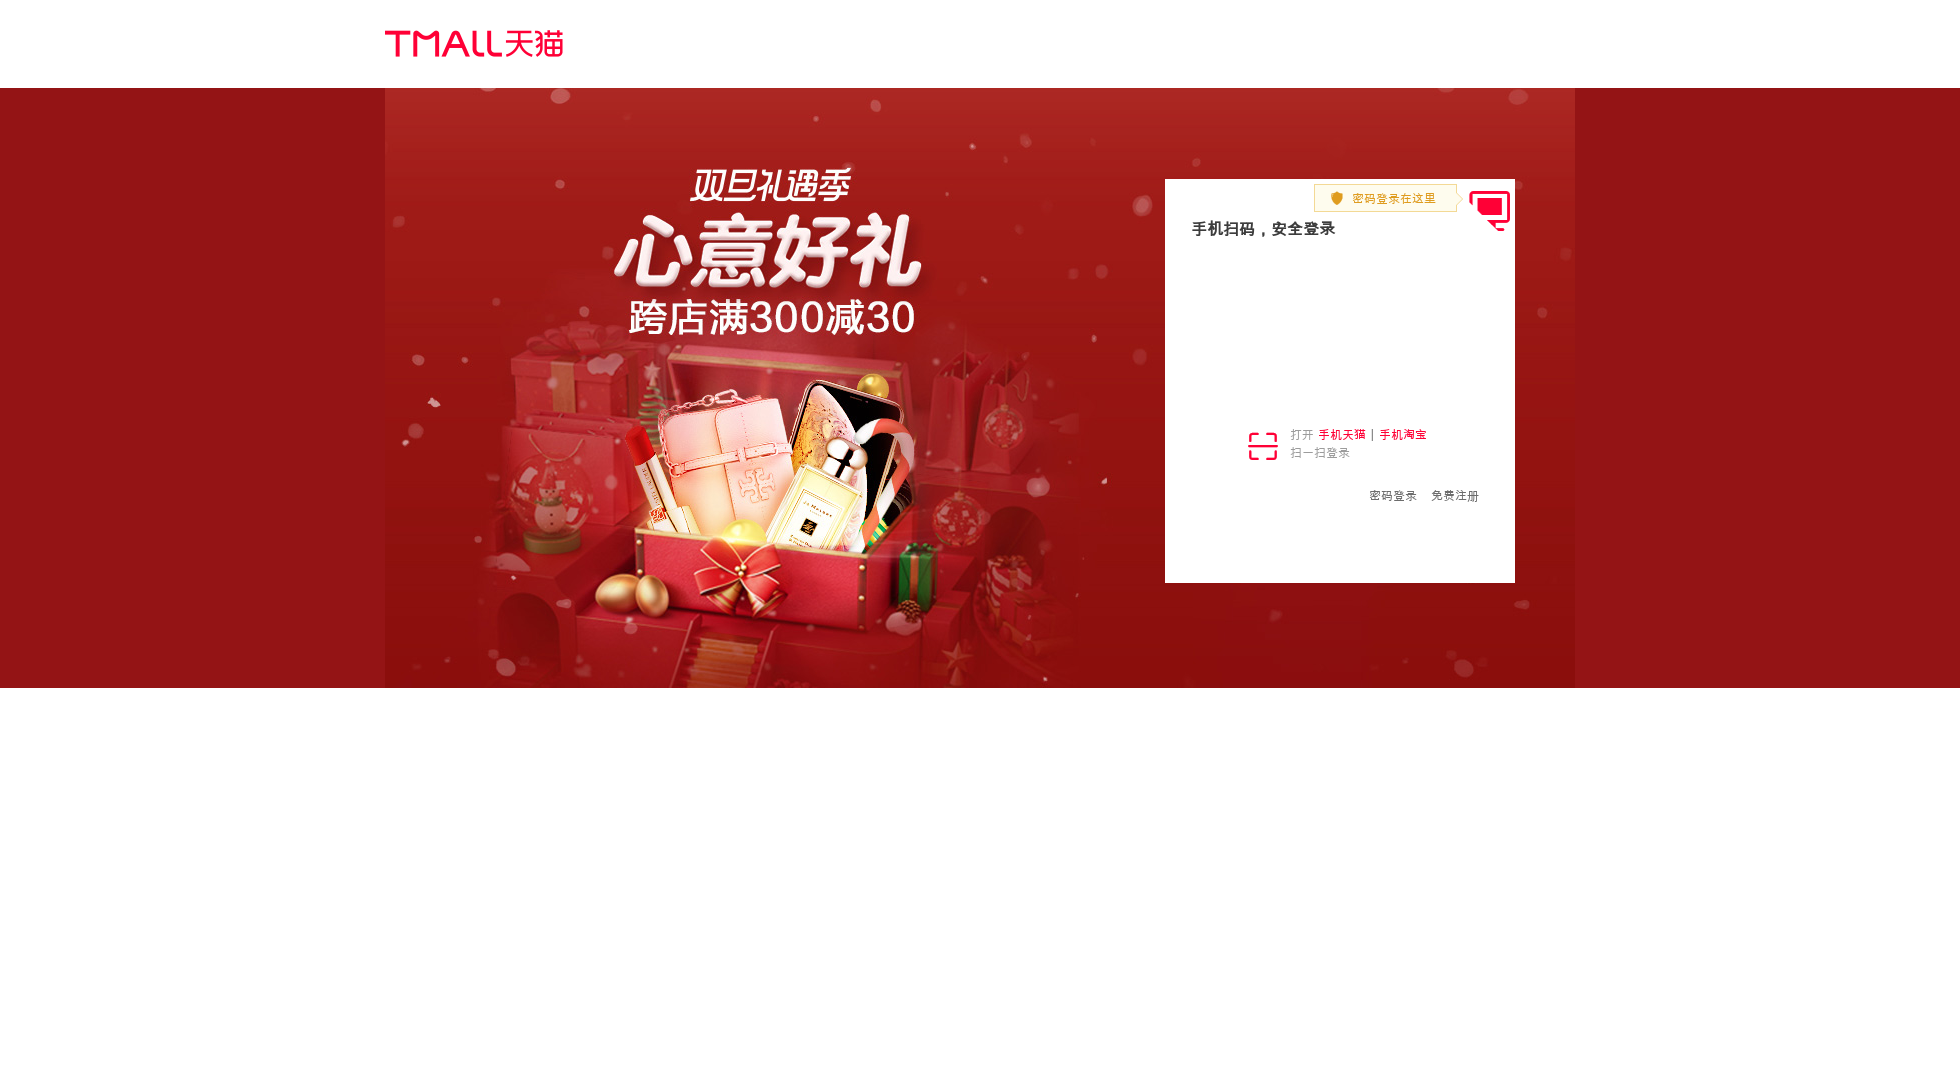

In [103]:
driver.get('https://login.tmall.com/?spm=875.7931836/B.a2226mz.1.66144265MqSmtE&redirectURL=https%3A%2F%2Fwww.tmall.com%2F')
driver.save_screenshot('screenshot/tmall_login.png')
Image('screenshot/tmall_login.png')

In [104]:
driver.page_source

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" class="ks-webkit537 ks-webkit ks-chrome71 ks-chrome"><head><script charset="utf-8" src="https://fragment.tmall.com/tmbase/mui_footer_link?wh_callback=true&amp;_ksTS=1545278194513_64&amp;callback=mui_footer_link" async=""></script><script charset="utf-8" src="https://g.alicdn.com/kissy/k/1.4.10/??node-min.js,anim-min.js,anim/base-min.js,anim/timer-min.js,anim/transition-min.js" async=""></script><script charset="utf-8" src="https://g.alicdn.com/mui/view-port-listen/3.0.1/??index.js" async=""></script><script charset="utf-8" src="https://g.alicdn.com/mui/brandbar/3.0.6/??brandbar.js" async=""></script><script type="text/javascript" async="" src="https://g.alicdn.com/alilog/oneplus/entry.js?t=214621"></script><script type="text/javascript" async="" src="https://g.alicdn.com/secdev/entry/index.js?t=214621" id="aplus-sufei"></script><script charset="utf-8" src="https://g.alicdn.com/kissy/k/1.4.10/??base-min.js,attribute-min.js" asyn

In [110]:
driver.find_elements_by_class_name('login-title')

[]